# Задача 1

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


## 1.1. Скачать следующие данные: kc-house-data и laptop_price

In [8]:
import pandas as pd
import numpy as np

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house = pd.read_csv('./kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
laptop = pd.read_csv('./laptop_price.csv', encoding='1251')
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## 1.2. Изучите стоимости недвижимости

### 1. Посмотрим как распределена стоимость во всем датафрейме

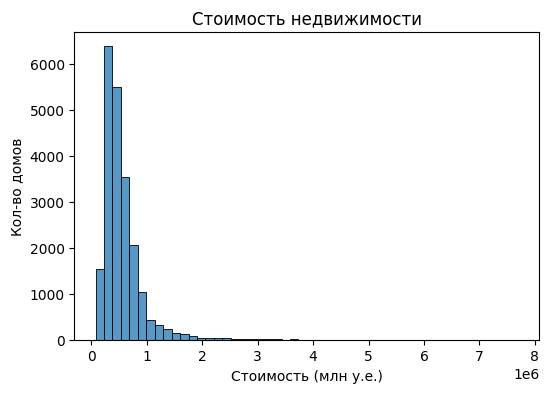

In [23]:
plt.figure(figsize=(6,4))

sns.histplot(house['price'], bins=50)

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость (млн у.е.)')
plt.ylabel('Кол-во домов');

# Вывод: стоимость большинства домой в датафрейме находится в пределах 1 млн, также много домов с ценой 1-2 млн
# однако есть выбросы вплоть до 8 млн

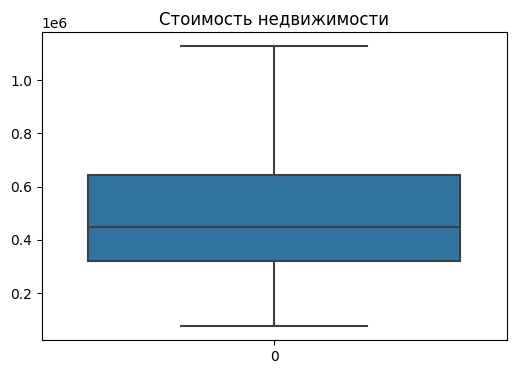

In [27]:
plt.figure(figsize=(6,4))

sns.boxplot(data = house['price'], showfliers=False)

plt.title('Стоимость недвижимости');

# Вывод: легче проанализировать основную массу значений, если убрать выбросы
# 50% домов стоят примерно от 0.3 до 0.65 млн у.е. 
# усы находятся на уровне примерно от 0.1 до 1.1 млн - это наиболее часто встречающиеся цены в выборке из датафрейма

### 2. Изучим взаимосвязь цены с другими признаками

In [30]:
data = house
data.drop(columns=['id','date'], inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0
grade,0.7,0.4,0.7,0.8,0.0,0.5,0.0,0.3,0.0,1.0,0.8,0.0,0.4,0.0,0.0,0.0,0.0,0.7,0.0


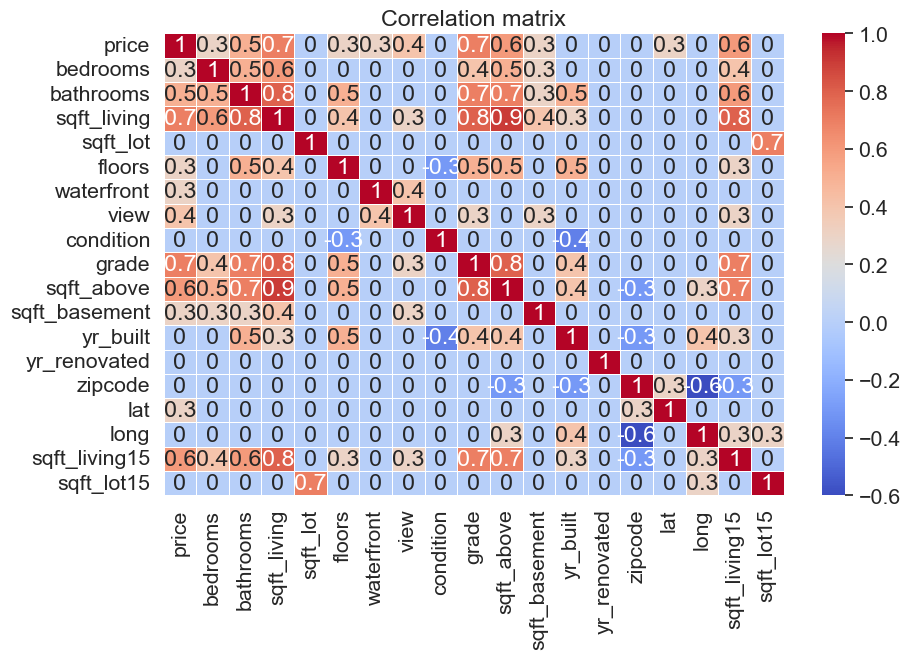

In [34]:
plt.figure(figsize=(10, 6))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

# В матрице взаимосвязей видим значимую корреляцию цены с жилой площадью дома и с оценкой дома
# С другими признаками сильной взаимосвязи не найдено. Либо взаимосвязи нет, либо в датафрейме присутствует 
# несколько групп домов, имеющих различные признаки

In [36]:
# Стоимость домов с количеством спален до 3

data = house[house['bedrooms'] <= 3]

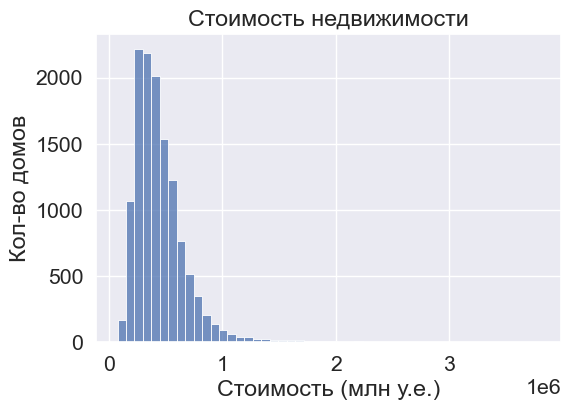

In [37]:
plt.figure(figsize=(6,4))

sns.histplot(data['price'], bins=50)

plt.title('Стоимость недвижимости')
plt.xlabel('Стоимость (млн у.е.)')
plt.ylabel('Кол-во домов');

# если мы сократим выборку, взяв только те дома, где 3 или меньше спален, то увидим, что характер распределения 
# цен аналогичный и тому, что был в общей выборке, но само распределенее более сжато в сторону меньшей цены. 

## 1.3. Изучите распределение квадратуры жилой

In [38]:
house.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1573,525000.0,4,2.50,2400,10070,1.0,0,0,3,7,1510,890,1967,0,98034,47.7104,-122.240,2030,9964
12075,156000.0,1,0.75,470,15000,1.0,0,0,3,4,470,0,1947,0,98014,47.6554,-121.908,1730,22500
18720,475000.0,2,1.00,920,5157,1.0,0,0,3,6,920,0,1909,0,98118,47.5499,-122.269,1700,5150
16720,2140000.0,6,4.00,5110,7128,2.5,0,0,4,11,5110,0,1906,0,98112,47.6285,-122.304,4110,6480
6781,217000.0,2,1.00,770,9715,1.0,0,0,4,6,770,0,1942,0,98168,47.4924,-122.312,1140,9715


##### Минимальное и максимальное значение квадратуры в выборке домов

In [39]:
house['sqft_living'].min(), house['sqft_living'].max()

(290, 13540)

##### Гистограмма и боксплот с жилой квадратурой

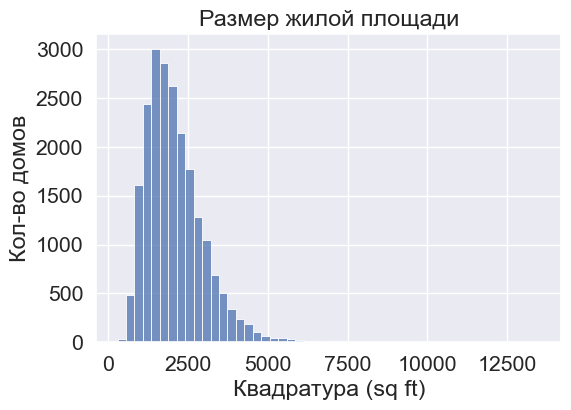

In [46]:
plt.figure(figsize=(6,4))

sns.histplot(house['sqft_living'], bins=50)

plt.title('Размер жилой площади')
plt.xlabel('Квадратура (sq ft)')
plt.ylabel('Кол-во домов');

# Вывод: максим

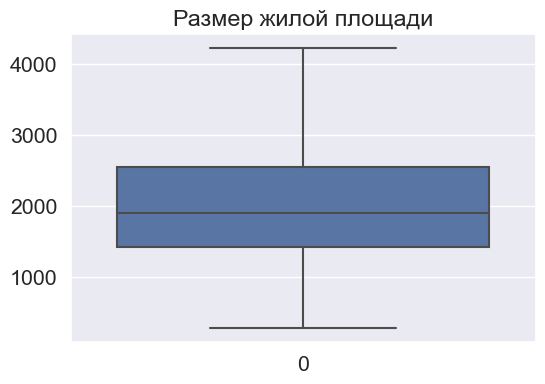

In [45]:
plt.figure(figsize=(6,4))

sns.boxplot(data = house['sqft_living'], showfliers=False)

plt.title('Размер жилой площади');


Вывод: в 50% домов квадратура жилой площади находится в промежутке 1500-2500 кв.фт. 75% домов имеют площадь менее 4500 кв фт. Однако присутствуют выбросы, доходящие до 12,5 тыс. 
По ранее использованному тепловому графику зависимости видим, что наиболее сильная корреляция у жилой площади с признаком жилой площади без учета площади подвала. Это можно объяснить схожестью значений признаков.
Также сильная корреляция с признаками оценки дома и кол-вом ванных комнат в доме. То есть чем выше оценка дома, тем больше у него размер жилой площади. И чем больше жилая площадь, тем больше ванных комнат в доме.
Менее слабая зависимость наблюдается с признаком цены дома.

## 1.4. Изучите распределение года постройки

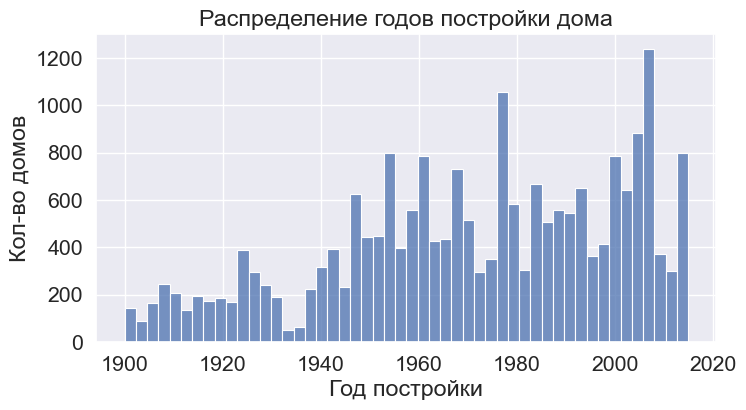

In [55]:
plt.figure(figsize=(8,4))

sns.histplot(house['yr_built'], bins=50)

plt.title('Распределение годов постройки дома')
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов');

Вывод: по графику видно, что в датафрейме основная масса домов построена после 1940 г. Со временем кол-во построенных домов растет. Значит, в данном регионе растет население. 

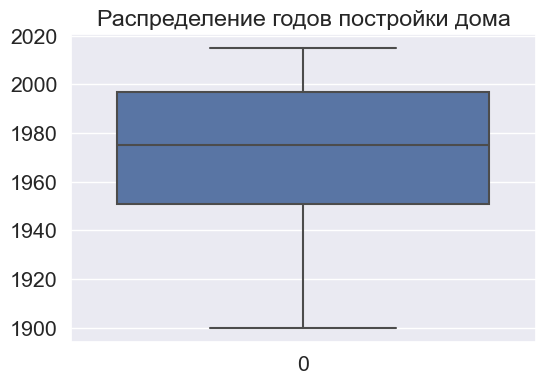

In [56]:
plt.figure(figsize=(6,4))

sns.boxplot(data = house['yr_built'], showfliers=False)

plt.title('Распределение годов постройки дома');

По боксплоту видим, что 50% домов построены в период примерно 1950-1998 гг. 

Год постройки не имеет значимой корреляции с каким-либо другим признаком, однако можно заметить, что отрицательный коэффициент корреляции с признаком оценки состояния дома может указывать на то, что у некоторой части домов чем старше год постройки, тем хуже оценка состояния.

# 2 задача

## 2.1. Изучите распределение домов от наличия вида на набережную

Постройте график
Сделайте выводы

In [91]:
data = house['waterfront'].value_counts()
data.index=['no','yes']
data.head()

no     21450
yes      163
Name: count, dtype: int64

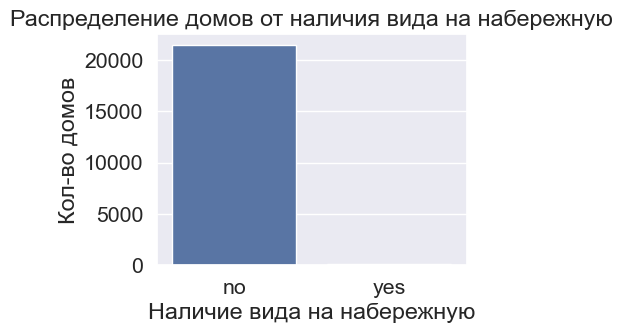

In [98]:
plt.figure(figsize=(4, 3))    
plt.title('Распределение домов от наличия вида на набережную')
sns.barplot(x=['no','yes'], y=counts.values)
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Кол-во домов');
    
plt.show()

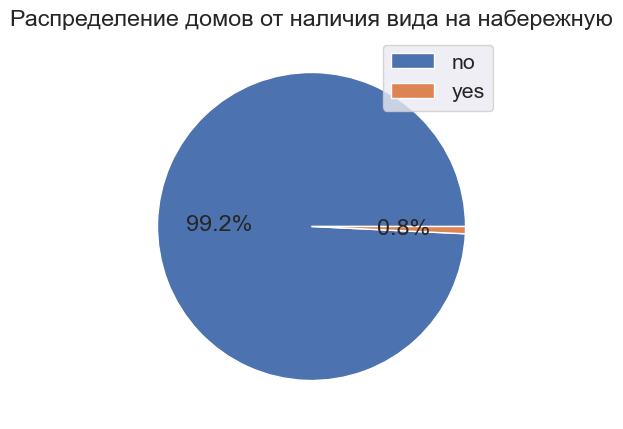

In [97]:
plt.figure(figsize=(6,5))

plt.pie(data, autopct='%1.1f%%') 
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);

Практически все дома не имеют вида на набережную. Использование столбчатых диаграмм неудобно и в данном случае лучше использовать круговую диаграмму, где мы видим, насколько мало кол-во домов с видом на набережную - менее 1%.

## 2.2. Изучите распределение этажей домов

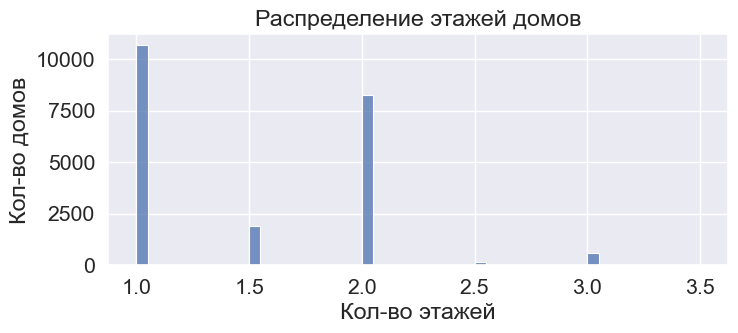

In [103]:
plt.figure(figsize=(8,3))

sns.histplot(house['floors'], bins=50)

plt.title('Распределение этажей домов')
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');

In [104]:
data = house['floors'].value_counts()
data.head()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
Name: count, dtype: int64

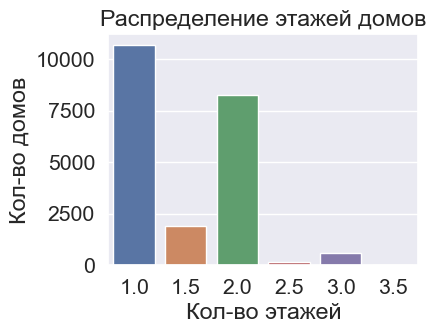

In [111]:
plt.figure(figsize=(4, 3))    
plt.title('Распределение этажей домов')
sns.barplot(x=data.index, y=data.values)
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во домов');
    
plt.show()

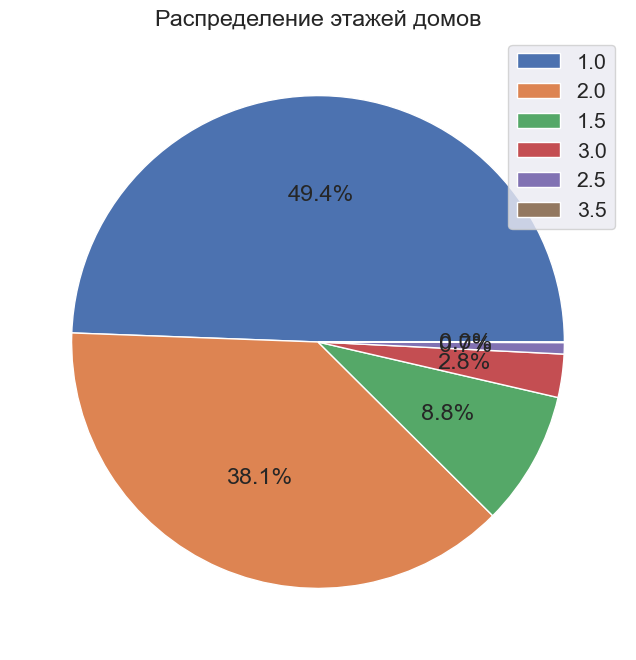

In [115]:
plt.figure(figsize=(8,8))

plt.pie(data, autopct='%1.1f%%') 
plt.title('Распределение этажей домов')
plt.legend(data.index);

Использование барплота или круговой диаграммы в данном сравнении более удобно для воспрятия.
Мы видим, что в основном в домах 1 или два этажа. Почти у 50% домов 1 этаж. Менее 1% домов, где 2.5 этажа. Практически нет домов, где 3.5 этажа.

## 2.3. Изучите распределение состояния домов

In [119]:
data = house['condition'].value_counts()
data

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

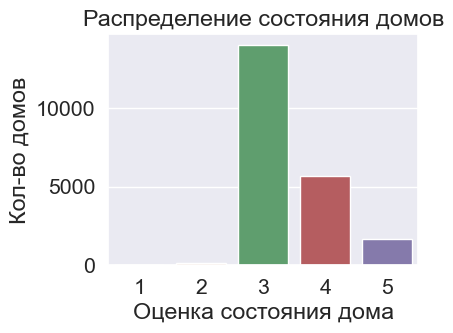

In [121]:
plt.figure(figsize=(4, 3))    
plt.title('Распределение состояния домов')
sns.barplot(x=data.index, y=data.values)
plt.xlabel('Оценка состояния дома')
plt.ylabel('Кол-во домов');
    
plt.show()

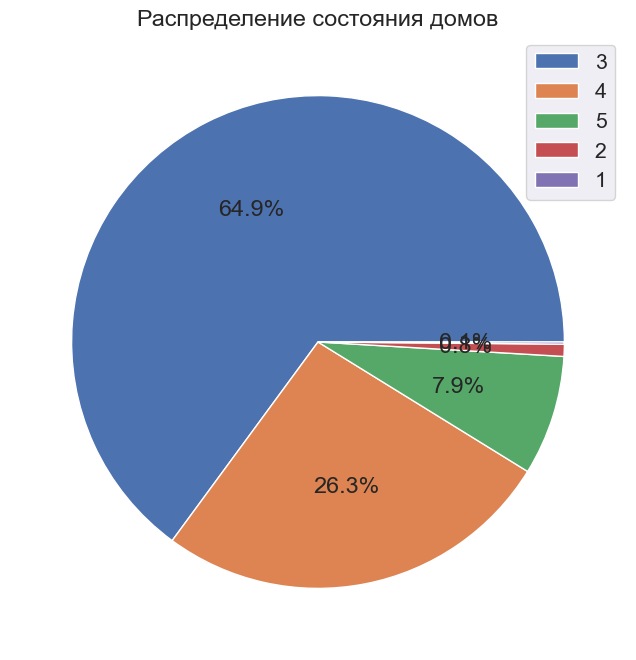

In [122]:
plt.figure(figsize=(8,8))

plt.pie(data, autopct='%1.1f%%') 
plt.title('Распределение состояния домов')
plt.legend(data.index);

Почти 65% домов имеет оценку состояния 3. Менее 1% домов с оценкой 1 или 2. То есть в основном дома в нормальном состоянии. 
По значению коэффициента корреляции видим наличие положительной взаимосвязи оценки с площадью дома: чем больше площадь дома, тем более вероятно, что его состояние будет лучше.
Также достаточно сильная взаимосвязь с ценой. Дома в лучшем состоянии стоят дороже.

# 3 задача

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [123]:
# продублируем корреляционную матрицу и тепловую диаграмму

In [127]:
data = house
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,delta_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1991,40
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,1987,0


In [128]:
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,delta_renovated
price,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,...,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0,0.0,0.0
bedrooms,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,...,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0
bathrooms,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,...,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0,0.5,0.0
sqft_living,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,...,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0,0.3,0.0
sqft_lot,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0
floors,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,...,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0,0.5,0.0
waterfront,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,...,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,...,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,-0.4,0.0
grade,0.7,0.4,0.7,0.8,0.0,0.5,0.0,0.3,0.0,1.0,...,0.0,0.4,0.0,0.0,0.0,0.0,0.7,0.0,0.5,0.0


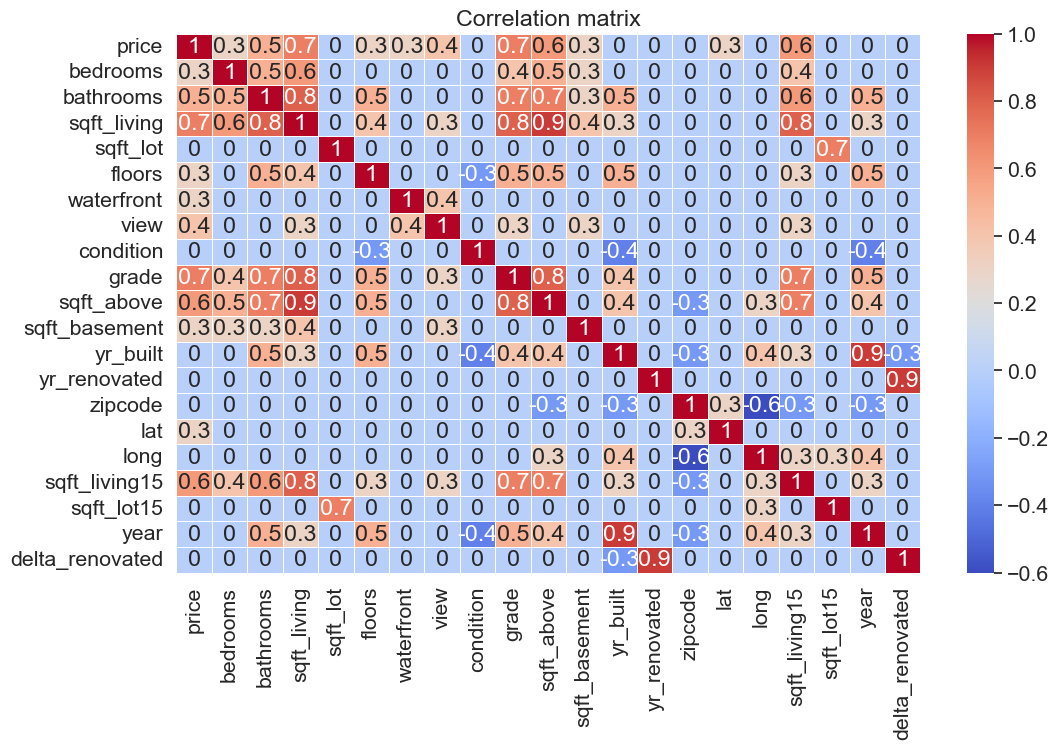

In [131]:
plt.figure(figsize=(12, 7))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

По тепловой диаграмме видим, что на стоимость больше всего влияют жилая площадь и оценка дома.

In [151]:
data = house.groupby(['grade']).agg({'price':'median'}).reset_index()
data

,grade,price
0,1,142000.0
1,3,262000.0
2,4,205000.0
3,5,228700.0
4,6,275276.5
5,7,375000.0
6,8,510000.0
7,9,720000.0
8,10,914327.0
9,11,1284000.0


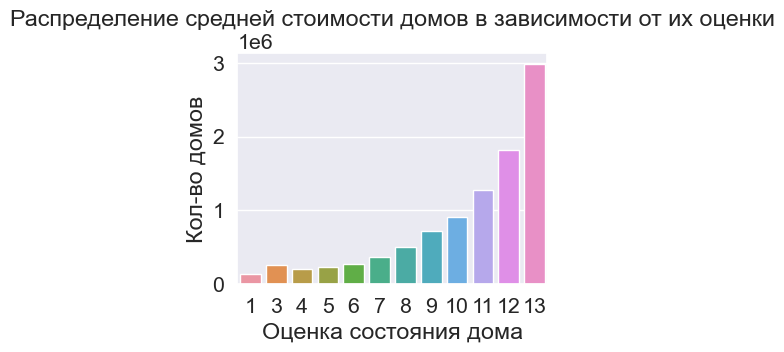

In [153]:
plt.figure(figsize=(4, 3))    
plt.title('Распределение средней стоимости домов в зависимости от их оценки')
sns.barplot(x=data['grade'], y=data['price'])
plt.xlabel('Оценка состояния дома')
plt.ylabel('Кол-во домов');
    
plt.show()

Видим прямую зависимость средней стоимости дома от его оценки. Чем выше оценка дома, тем выше его стоимость.

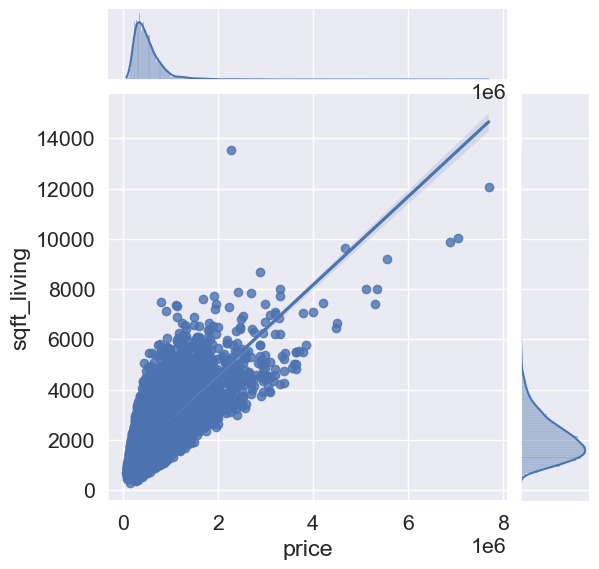

In [154]:
sns.jointplot(x=house['price'], y=house['sqft_living'], kind='reg');

В целом видим, что чем больше площадь, тем выше цена на дом, однако разброс значений идет не совсем по линейному рисунку.

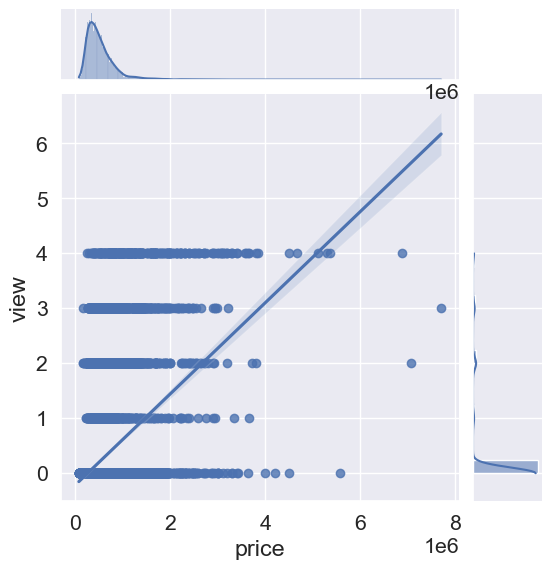

In [155]:
sns.jointplot(x=house['price'], y=house['view'], kind='reg');

В целом наличие красивого вида не влияет на цену дома.

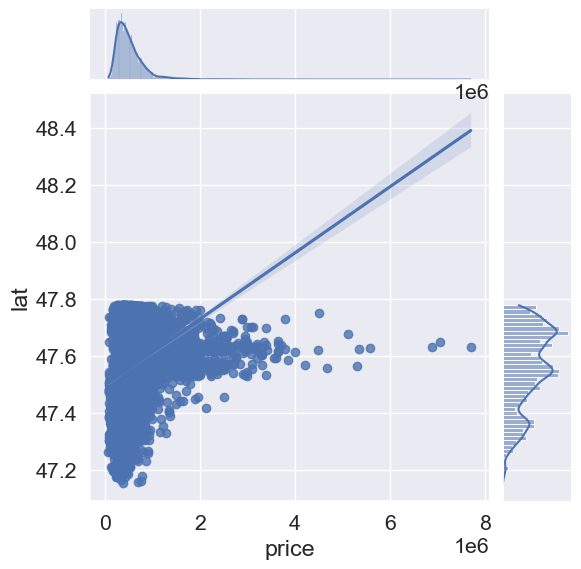

In [156]:
sns.jointplot(x=house['price'], y=house['lat'], kind='reg');

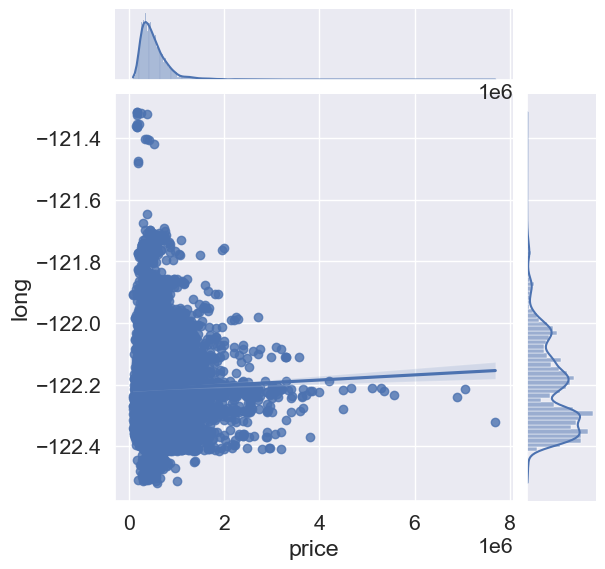

In [157]:
sns.jointplot(x=house['price'], y=house['long'], kind='reg');

При анализе взаимосвязи долготы и широты с ценой видим, что на широте 47.6 и долготе -122.2 находятся дома с самыми высокими ценами. Это похоже на более престижный район.
